In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/South Melbourne.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

print(df.head())


           Unnamed: 0                Unnamed: 1 Mar 2010 Unnamed: 83 Jun 2010  \
0  Southern Melbourne  Aspendale-Chelsea-Carrum    1,362     $320.00    1,393   
1                 NaN                 Bentleigh    1,589     $370.00    1,608   
2                 NaN                  Brighton      723     $550.00      733   
3                 NaN             Brighton East      366     $520.00      325   
4                 NaN                  Carnegie      919     $305.00      935   

  Unnamed: 85 Sep 2010 Unnamed: 87 Dec 2010 Unnamed: 89  ... Mar 2019  \
0     $320.00    1,386     $330.00    1,411     $340.00  ...    1,483   
1     $380.00    1,609     $380.00    1,625     $385.00  ...    2,505   
2     $550.00      722     $550.00      730     $550.00  ...    1,010   
3     $520.00      324     $536.00      337     $550.00  ...      422   
4     $315.00      929     $320.00      944     $325.00  ...    1,340   

  Unnamed: 155 Jun 2019 Unnamed: 157 Sep 2019 Unnamed: 159 Dec 2019  \
0  

In [2]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

# Display the updated DataFrame
print(df)


                  Area                       Suburb Count.1 Median.1 Count.2  \
0   Southern Melbourne     Aspendale-Chelsea-Carrum   1,362  $320.00   1,393   
1                  NaN                    Bentleigh   1,589  $370.00   1,608   
2                  NaN                     Brighton     723  $550.00     733   
3                  NaN                Brighton East     366  $520.00     325   
4                  NaN                     Carnegie     919  $305.00     935   
5                  NaN                    Caulfield   1,636  $360.00   1,651   
6                  NaN                   Cheltenham   1,207  $350.00   1,225   
7                  NaN                  Elsternwick     563  $350.00     557   
8                  NaN            Hampton-Beaumaris     968  $475.00     975   
9                  NaN                      Malvern     440  $388.00     441   
10                 NaN                 Malvern East     808  $350.00     817   
11                 NaN  Mentone-Parkdale

In [3]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()


In [4]:
# Automatically rename duplicate "Median" columns
new_columns = []
counter = 1

for col in median_data.columns:
    if col == 'Median':
        new_columns.append(f"Median_{counter}")
        counter += 1
    else:
        new_columns.append(col)

median_data.columns = new_columns

# Print the renamed columns to verify
print("Renamed Columns:")
print(median_data.columns)

# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')



Renamed Columns:
Index(['Suburb', 'Median.1', 'Median.2', 'Median.3', 'Median.4', 'Median.5',
       'Median.6', 'Median.7', 'Median.8', 'Median.9', 'Median.10',
       'Median.11', 'Median.12', 'Median.13', 'Median.14', 'Median.15',
       'Median.16', 'Median.17', 'Median.18', 'Median.19', 'Median.20',
       'Median.21', 'Median.22', 'Median.23', 'Median.24', 'Median.25',
       'Median.26', 'Median.27', 'Median.28', 'Median.29', 'Median.30',
       'Median.31', 'Median.32', 'Median.33', 'Median.34', 'Median.35',
       'Median.36', 'Median.37', 'Median.38', 'Median.39', 'Median.40',
       'Median.41'],
      dtype='object')


<>:22: SyntaxWarning: invalid escape sequence '\$'
<>:22: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_73160/1169883358.py:22: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [5]:
# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to numeric:")
print(median_data.head())

Median Data after conversion to numeric:
                     Suburb  Median.1  Median.2  Median.3  Median.4  Median.5  \
0  Aspendale-Chelsea-Carrum     320.0     320.0     330.0     340.0     350.0   
1                 Bentleigh     370.0     380.0     380.0     385.0     395.0   
2                  Brighton     550.0     550.0     550.0     550.0     550.0   
3             Brighton East     520.0     520.0     536.0     550.0     565.0   
4                  Carnegie     305.0     315.0     320.0     325.0     335.0   

   Median.6  Median.7  Median.8  Median.9  ...  Median.32  Median.33  \
0     350.0     350.0     350.0     350.0  ...      420.0      420.0   
1     395.0     400.0     400.0     400.0  ...      480.0      480.0   
2     585.0     590.0     590.0     595.0  ...      650.0      650.0   
3     588.0     570.0     575.0     590.0  ...      660.0      675.0   
4     330.0     330.0     330.0     330.0  ...      418.0      420.0   

   Median.34  Median.35  Median.36  Med

In [6]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
                     Suburb  Median.1  Median.2  Median.3  Median.4  Median.5  \
0  Aspendale-Chelsea-Carrum       320       320       330       340       350   
1                 Bentleigh       370       380       380       385       395   
2                  Brighton       550       550       550       550       550   
3             Brighton East       520       520       536       550       565   
4                  Carnegie       305       315       320       325       335   

   Median.6  Median.7  Median.8  Median.9  ...  Median.32  Median.33  \
0       350       350       350       350  ...        420        420   
1       395       400       400       400  ...        480        480   
2       585       590       590       595  ...        650        650   
3       588       570       575       590  ...        660        675   
4       330       330       330       330  ...        418        420   

   Median.34  Median.35  Median.36  Me

Growth trend for Aspendale-Chelsea-Carrum:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>       0.0     3.125  3.030303  2.941176       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0       0.0   1.428571  ...        0.0        0.0   2.380952   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   2.325581        0.0        0.0        0.0  -0.454545  13.013699   

   Average Growth Rate (%)  
0                  1.11926  

[1 rows x 42 columns]


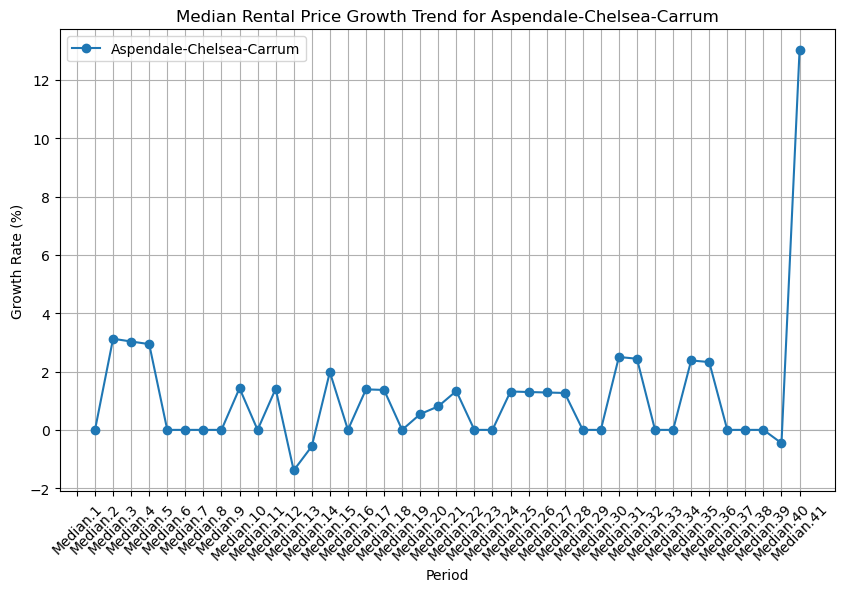

Growth trend for Bentleigh:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>  2.702703       0.0  1.315789  2.597403       0.0  1.265823   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1       0.0       0.0        0.0  ...        0.0   1.041667   1.030928   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1   1.020408   1.010101        0.0        0.0        2.0   7.843137   

   Average Growth Rate (%)  
1                 1.006082  

[1 rows x 42 columns]


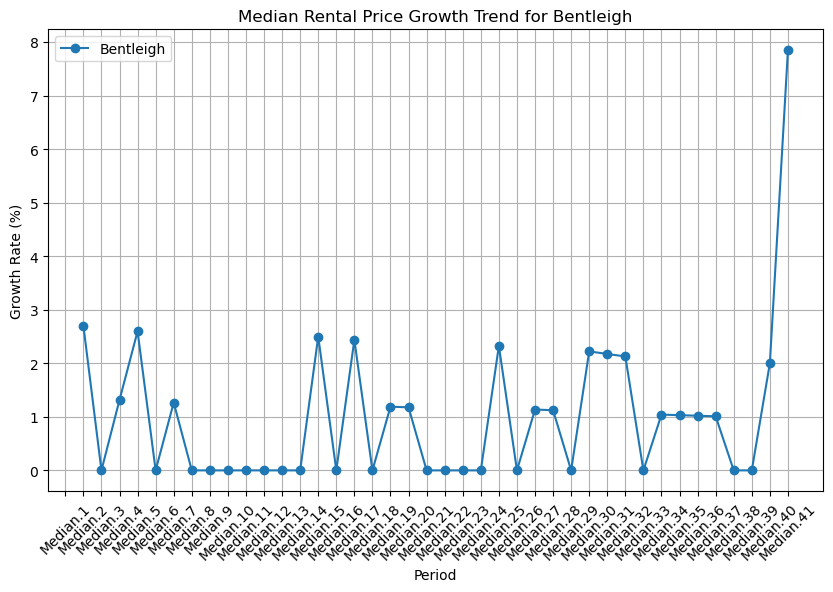

Growth trend for Brighton:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>       0.0       0.0       0.0       0.0  6.363636  0.854701   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2       0.0  0.847458  -0.840336  ...        0.0        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2  -3.076923   1.587302     1.5625        0.0   2.307692   9.022556   

   Average Growth Rate (%)  
2                 0.728881  

[1 rows x 42 columns]


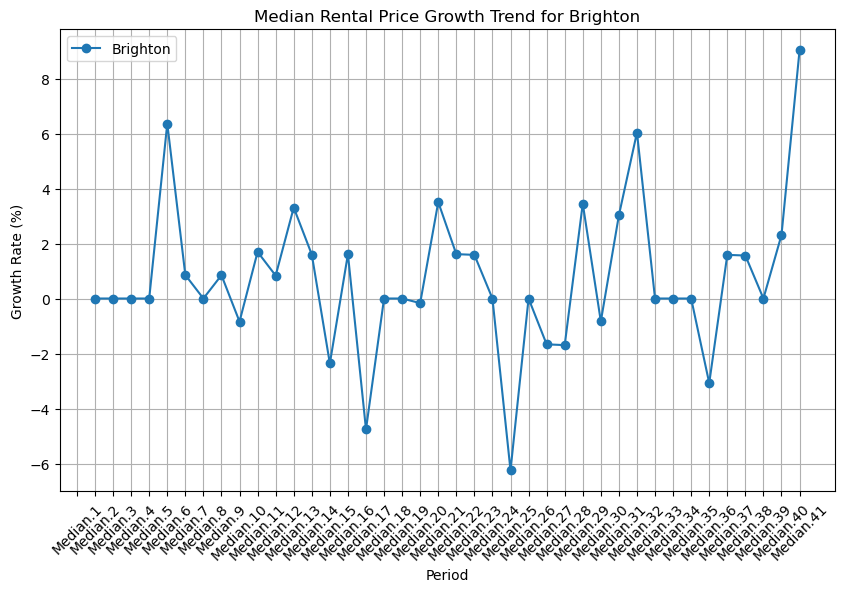

Growth trend for Brighton East:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>       0.0  3.076923   2.61194  2.727273  4.070796 -3.061224   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3  0.877193  2.608696   0.847458  ...   2.272727  -0.296296   2.526003   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3        0.0   1.449275        0.0        0.0        0.0  11.857143   

   Average Growth Rate (%)  
3                 1.062049  

[1 rows x 42 columns]


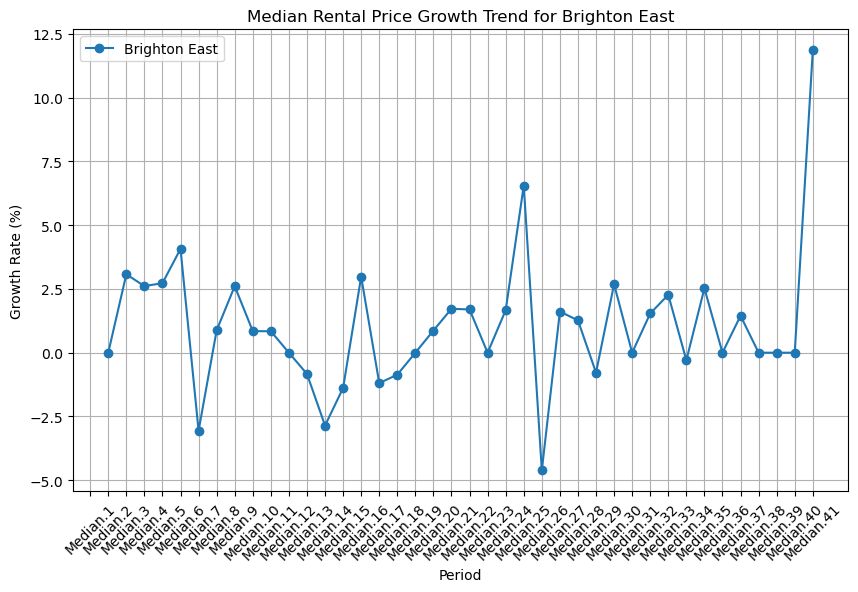

Growth trend for Carnegie:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>  3.278689  1.587302    1.5625  3.076923 -1.492537       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4       0.0       0.0   4.545455  ...   0.478469        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4   1.190476   1.176471   1.162791   1.149425  -1.136364   -0.45977   

   Average Growth Rate (%)  
4                 0.888118  

[1 rows x 42 columns]


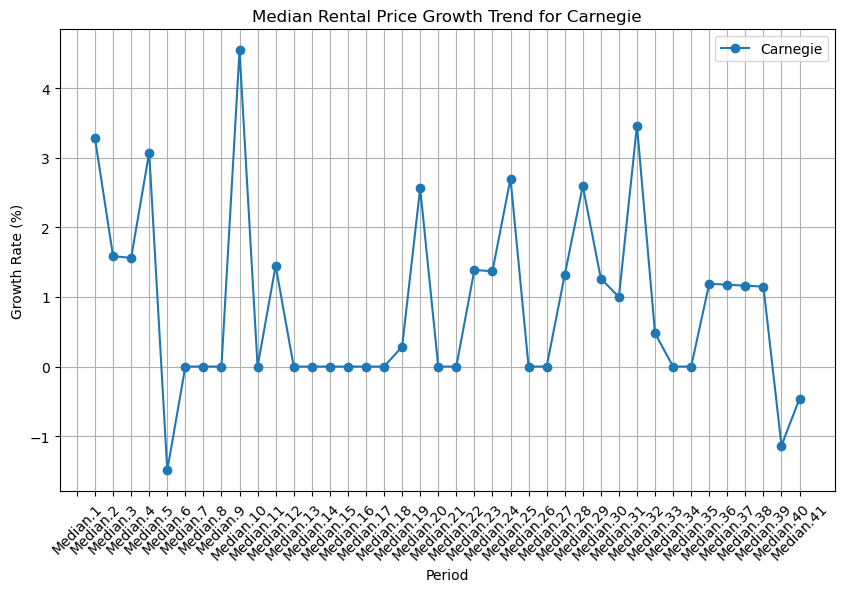

Growth trend for Caulfield:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
5      <NA>       0.0  2.777778  2.702703       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
5  1.315789  1.298701   1.282051  ...   0.681818   1.580135   1.111111   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
5   1.098901   2.173913        0.0    1.06383        0.0   4.210526   

   Average Growth Rate (%)  
5                 0.805802  

[1 rows x 42 columns]


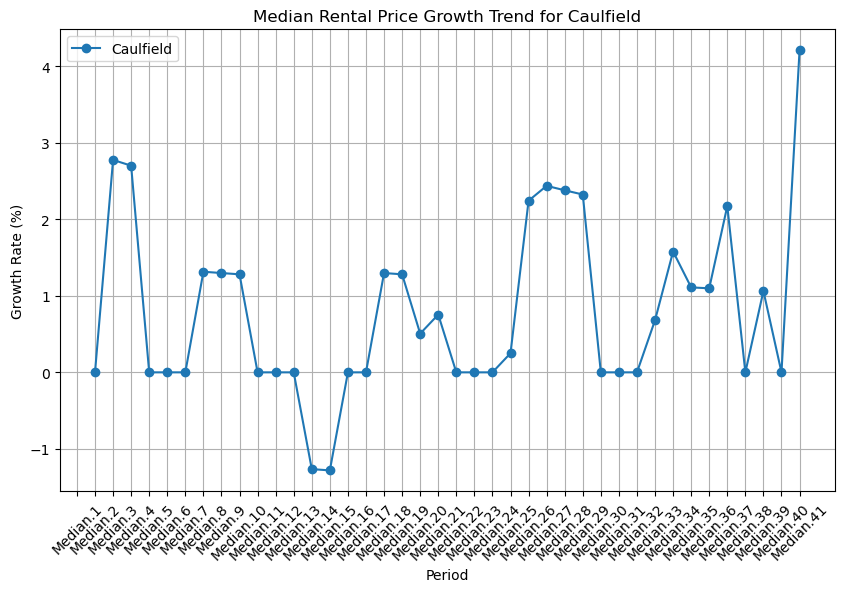

Growth trend for Cheltenham:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
6      <NA>  2.857143  2.777778  1.351351  1.333333       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
6  1.842105  0.775194        0.0  ...        0.0        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
6   1.111111   1.098901        0.0        0.0   2.173913   6.382979   

   Average Growth Rate (%)  
6                  0.90677  

[1 rows x 42 columns]


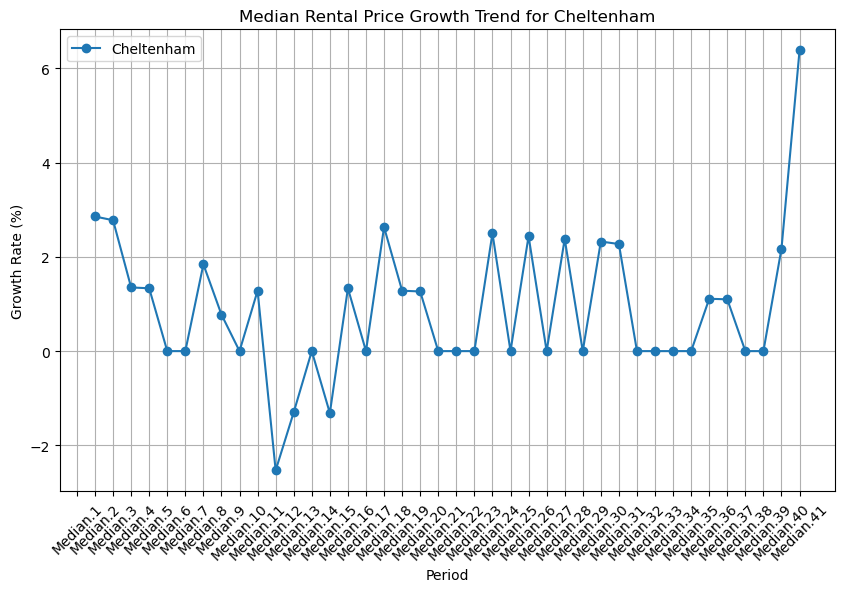

Growth trend for Elsternwick:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
7      <NA>       0.0  2.857143       0.0  2.777778       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
7  1.351351       4.0        0.0  ...        0.0        0.0   2.380952   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
7        0.0   4.651163        0.0  -2.222222   2.272727   4.444444   

   Average Growth Rate (%)  
7                 0.752321  

[1 rows x 42 columns]


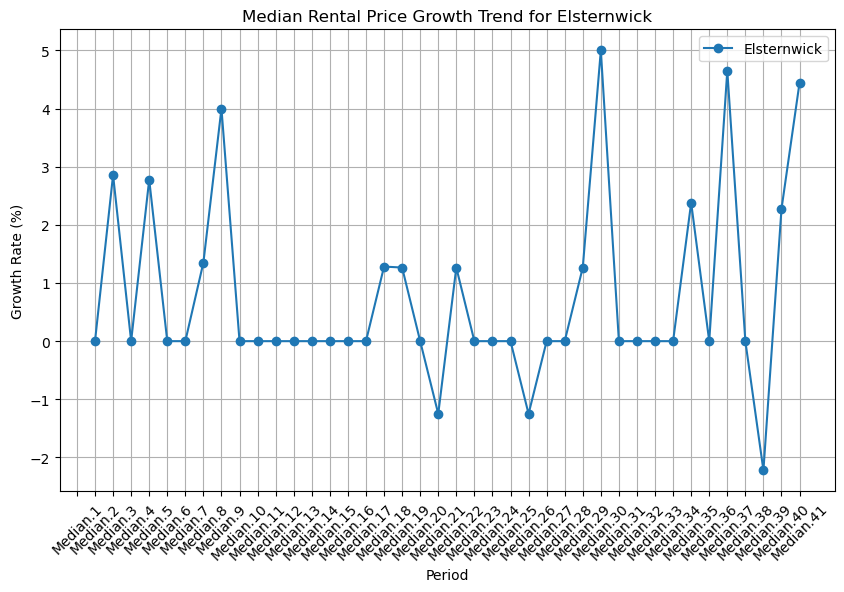

Growth trend for Hampton-Beaumaris:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
8      <NA>       0.0  1.052632       0.0       0.0  1.666667  1.434426   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
8       0.0  1.010101        0.0  ...        0.0        0.0   3.636364   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
8        0.0   0.877193   3.478261  -2.521008        0.0    8.62069   

   Average Growth Rate (%)  
8                 0.730969  

[1 rows x 42 columns]


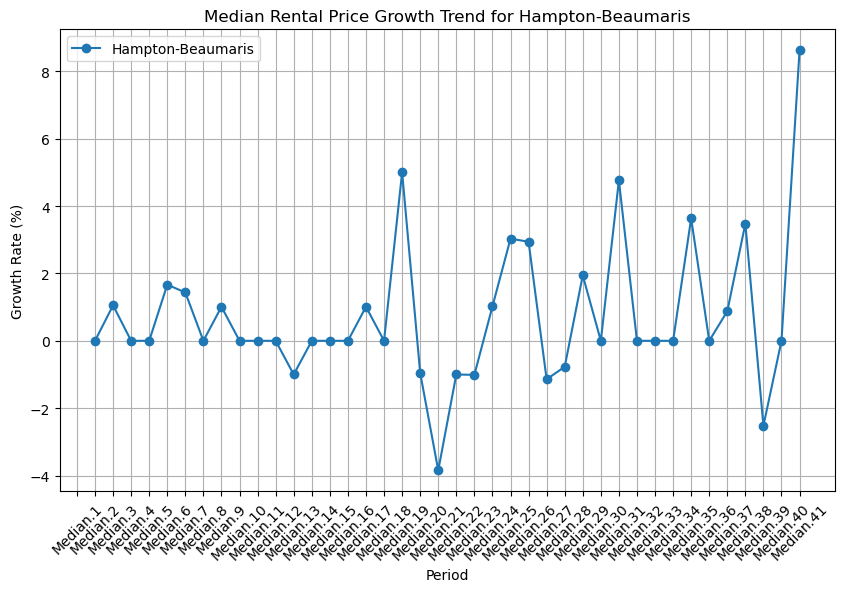

Growth trend for Malvern:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
9      <NA>  0.515464  1.282051       0.0 -1.265823  1.282051  1.265823   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
9       0.0       5.0        0.0  ...   2.173913    1.06383   3.157895   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
9   1.020408        0.0   1.010101       -1.0        0.0   1.010101   

   Average Growth Rate (%)  
9                 0.656425  

[1 rows x 42 columns]


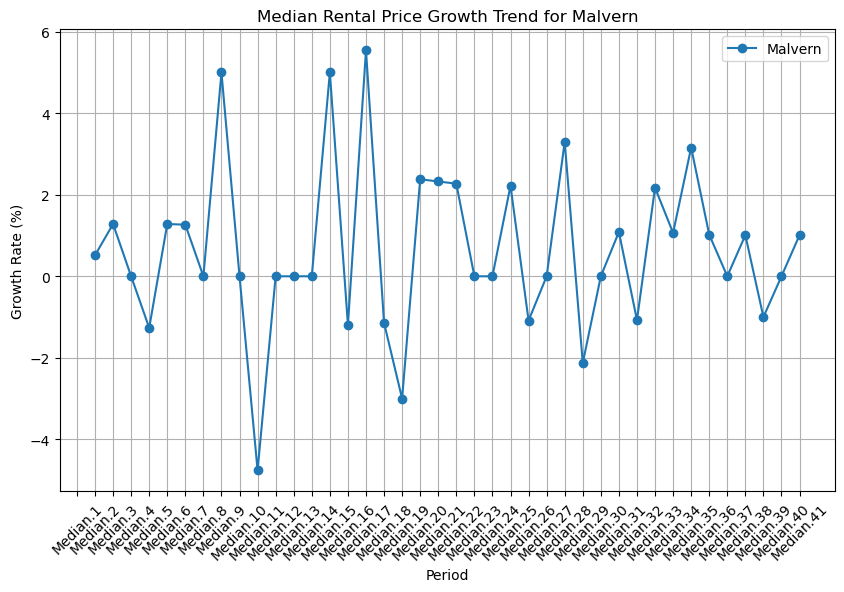

Growth trend for Malvern East:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
10      <NA>       0.0       0.0       0.0  4.285714       0.0  1.369863   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
10       0.0       0.0   1.351351  ...   1.190476        0.0   1.176471   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
10   1.162791   4.597701   1.098901        0.0        0.0   -3.26087   

    Average Growth Rate (%)  
10                 0.610945  

[1 rows x 42 columns]


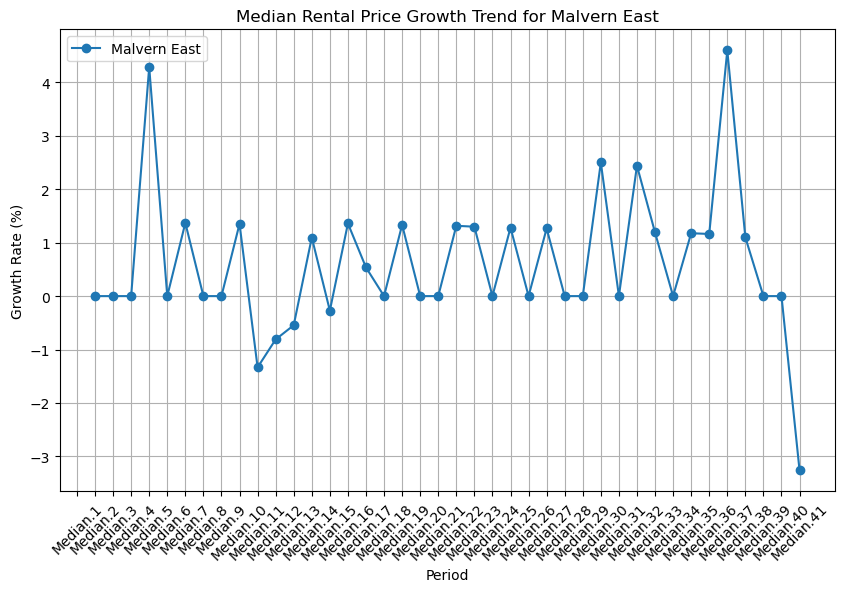

Growth trend for Mentone-Parkdale-Mordialloc:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
11      <NA>  1.587302    1.5625  1.538462       0.0  3.030303       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
11  2.941176       0.0        0.0  ...        2.5   2.439024        0.0   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
11   1.190476  -1.176471        0.0   1.190476   1.176471   9.302326   

    Average Growth Rate (%)  
11                 1.018918  

[1 rows x 42 columns]


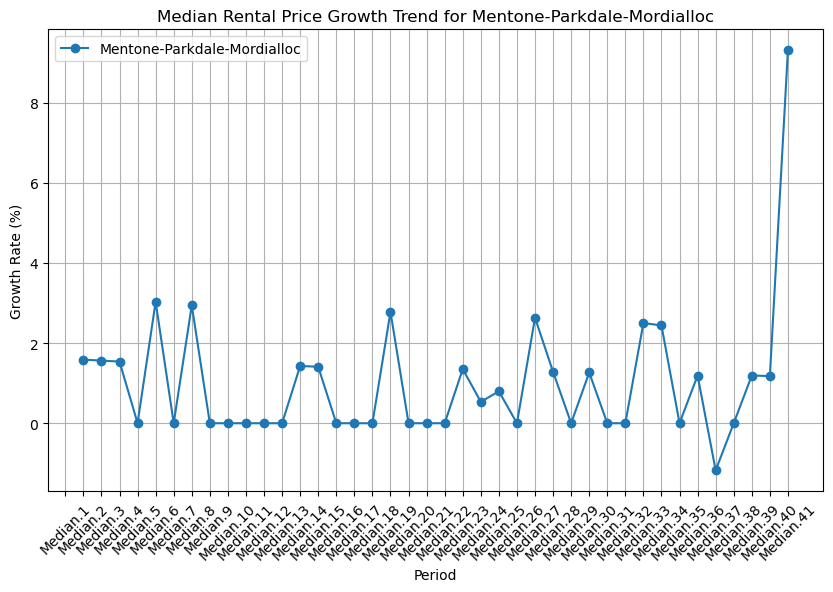

Growth trend for Murrumbeena-Hughesdale:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
12      <NA>  3.030303  2.352941  0.574713       0.0       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
12       0.0       0.0   2.857143  ...        0.0   2.439024   1.190476   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
12   1.176471        0.0        0.0        0.0   1.162791   3.448276   

    Average Growth Rate (%)  
12                 0.784375  

[1 rows x 42 columns]


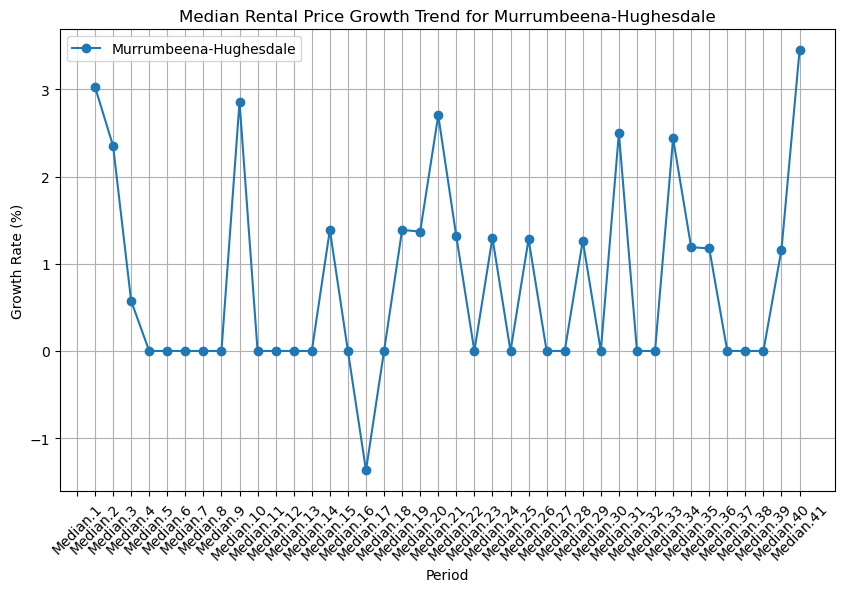

Growth trend for Group Total:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
13      <NA>       0.0  2.777778  1.351351  1.333333       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
13  1.315789  1.298701   1.282051  ...        0.0   2.222222        0.0   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
13   2.173913    1.06383        0.0   1.052632        0.0   4.166667   

    Average Growth Rate (%)  
13                 0.829504  

[1 rows x 42 columns]


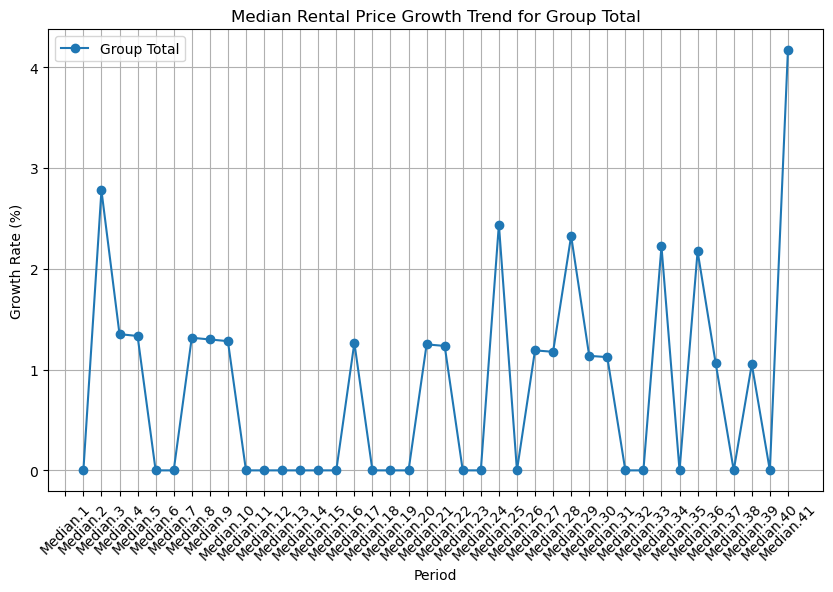

All suburbs growth trends:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0       <NA>       0.0     3.125  3.030303  2.941176       0.0       0.0   
1       <NA>  2.702703       0.0  1.315789  2.597403       0.0  1.265823   
2       <NA>       0.0       0.0       0.0       0.0  6.363636  0.854701   
3       <NA>       0.0  3.076923   2.61194  2.727273  4.070796 -3.061224   
4       <NA>  3.278689  1.587302    1.5625  3.076923 -1.492537       0.0   
5       <NA>       0.0  2.777778  2.702703       0.0       0.0       0.0   
6       <NA>  2.857143  2.777778  1.351351  1.333333       0.0       0.0   
7       <NA>       0.0  2.857143       0.0  2.777778       0.0       0.0   
8       <NA>       0.0  1.052632       0.0       0.0  1.666667  1.434426   
9       <NA>  0.515464  1.282051       0.0 -1.265823  1.282051  1.265823   
10      <NA>       0.0       0.0       0.0  4.285714       0.0  1.369863   
11      <NA>  1.587302    1.5625  1.538462       0.0  3.03030

In [7]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)

In [8]:
print(growth_trends["Average Growth Rate (%)"])

0      1.11926
1     1.006082
2     0.728881
3     1.062049
4     0.888118
5     0.805802
6      0.90677
7     0.752321
8     0.730969
9     0.656425
10    0.610945
11    1.018918
12    0.784375
13    0.829504
Name: Average Growth Rate (%), dtype: Float64


In [9]:
print(df["Suburb"])

0        Aspendale-Chelsea-Carrum
1                       Bentleigh
2                        Brighton
3                   Brighton East
4                        Carnegie
5                       Caulfield
6                      Cheltenham
7                     Elsternwick
8               Hampton-Beaumaris
9                         Malvern
10                   Malvern East
11    Mentone-Parkdale-Mordialloc
12         Murrumbeena-Hughesdale
13                    Group Total
Name: Suburb, dtype: object
